In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df_bank = pd.read_csv('bank-additional.csv', sep = ";")

df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
df_bank.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2897,34,management,single,high.school,no,no,no,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
866,38,admin.,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1384,34,entrepreneur,married,basic.4y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
2086,36,blue-collar,divorced,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
909,43,management,married,university.degree,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,no


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df_bank.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4119.0,NaN,NaN,NaN,40.11362,10.313362,18.0,32.0,38.0,47.0,88.0
job,4119,12,admin.,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4119,4,married,2509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4119,8,university.degree,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4119,3,no,3315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,4119,3,yes,2175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4119,3,no,3349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4119,2,cellular,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,4119,10,may,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,4119,5,thu,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_bank.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df_bank["cons.price.idx"].unique()

array([92.893, 93.994, 94.465, 93.2  , 94.199, 93.918, 93.444, 93.369,
       92.843, 92.963, 94.601, 94.027, 92.379, 92.431, 93.749, 93.075,
       94.055, 92.469, 94.767, 92.201, 92.649, 94.215, 93.876, 93.798,
       92.713, 92.756])

In [8]:
df_bank.age.value_counts()

age
32    216
31    191
30    177
34    174
35    172
     ... 
69      2
70      2
85      1
88      1
19      1
Name: count, Length: 67, dtype: int64

In [9]:
df_bank["education"].sort_values().tail(10)

1377    unknown
157     unknown
2036    unknown
3747    unknown
158     unknown
1863    unknown
230     unknown
3666    unknown
2489    unknown
3379    unknown
Name: education, dtype: object

In [10]:
df_bank.duplicated().sum()

0

In [11]:
df_bank[df_bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [12]:
df_bank_dup = df_bank[df_bank.duplicated(keep = False)]

df_bank_dup



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [13]:
df_bank_dup_sorted = df_bank_dup.sort_values(by = ["job", "cons.price.idx"])

df_bank_dup_sorted

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [14]:
df_bank = df_bank.drop("duration", axis = 1)

df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [15]:
df_bank.groupby(["age", "job"]).count()

marital  education  default  housing  loan  contact  month  \
age job                                                                       
18  student            3          3        3        3     3        3      3   
19  student            1          1        1        1     1        1      1   
20  blue-collar        1          1        1        1     1        1      1   
    student            3          3        3        3     3        3      3   
21  blue-collar        1          1        1        1     1        1      1   
...                  ...        ...      ...      ...   ...      ...    ...   
81  retired            3          3        3        3     3        3      3   
82  housemaid          2          2        2        2     2        2      2   
85  housemaid          1          1        1        1     1        1      1   
86  retired            2          2        2        2     2        2      2   
88  retired            1          1        1        1     1        1      1   

                 day_of_week  campaign  pdays  previous  poutcome  \
age job                                                             
18  student                3         3      3         3         3   
19  student                1         1      1         1         1   
20  blue-collar            1         1      1         1         1   
    student                3         3      3         3         3   
21  blue-collar            1         1      1         1         1   
...                      ...       ...    ...       ...       ...   
81  retired                3         3      3         3         3   
82  housemaid              2         2      2         2         2   
85  housemaid              1         1      1         1         1   
86  retired                2         2      2         2         2   
88  retired                1         1      1         1         1   

                 emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age job                                                                   
18  student                 3               3              3          3   
19  student                 1               1              1          1   
20  blue-collar             1               1              1          1   
    student                 3               3              3          3   
21  blue-collar             1               1              1          1   
...                       ...             ...            ...        ...   
81  retired                 3               3              3          3   
82  housemaid               2               2              2          2   
85  housemaid               1               1              1          1   
86  retired                 2               2              2          2   
88  retired                 1               1              1          1   

                 nr.employed  y  
age job                          
18  student                3  3  
19  student                1  1  
20  blue-collar            1  1  
    student                3  3  
21  blue-collar            1  1  
...                      ... ..  
81  retired                3  3  
82  housemaid              2  2  
85  housemaid              1  1  
86  retired                2  2  
88  retired                1  1  

[434 rows x 18 columns]

In [16]:
df_bank[df_bank.age>=80]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
150,82,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,3,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes
338,81,retired,married,basic.4y,no,no,no,cellular,may,mon,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
696,86,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes
1123,85,housemaid,divorced,basic.4y,unknown,yes,no,telephone,oct,fri,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no
1215,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
1591,80,retired,married,basic.4y,no,no,no,cellular,may,mon,1,3,3,success,-1.8,93.876,-40.0,0.697,5008.7,yes
1796,86,retired,married,unknown,unknown,yes,no,cellular,sep,tue,1,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes
3037,80,retired,divorced,high.school,no,yes,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
3210,80,retired,married,basic.4y,no,no,no,cellular,mar,fri,3,6,4,success,-1.8,93.369,-34.8,0.649,5008.7,yes
3549,82,housemaid,divorced,basic.4y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,-1.7,94.215,-40.3,0.881,4991.6,yes


In [17]:
df_bank[(df_bank.age>=70) & (df_bank.age<75) ]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
167,71,blue-collar,divorced,basic.4y,unknown,no,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,no
450,73,retired,married,university.degree,no,yes,no,cellular,mar,fri,1,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,yes
537,74,retired,married,university.degree,no,no,no,telephone,oct,mon,1,999,0,nonexistent,-1.1,94.601,-49.5,0.977,4963.6,no
1257,71,retired,married,basic.4y,no,yes,yes,cellular,oct,tue,1,6,1,success,-3.4,92.431,-26.9,0.728,5017.5,no
1314,71,retired,married,high.school,no,no,no,cellular,sep,mon,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
1363,72,retired,divorced,university.degree,no,no,no,cellular,aug,tue,1,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,no
1468,71,retired,single,university.degree,no,yes,no,cellular,oct,tue,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
1489,73,retired,married,professional.course,no,yes,no,cellular,aug,thu,2,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no
2767,74,retired,divorced,high.school,no,yes,yes,telephone,dec,mon,6,999,0,nonexistent,-3.0,92.713,-33.0,0.715,5023.5,no
3173,70,retired,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no


In [18]:
df_bank["poutcome"].value_counts()

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64

In [19]:
# poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# 'poutcome' is accepted as Ordinal. "failure": 0 , "nonexistent": 1, "success" : 2

In [20]:
df_bank["poutcome"] = df_bank["poutcome"].map({"failure": 0 , "nonexistent": 1, "success" : 2})

In [21]:
df_bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
834,28,blue-collar,single,basic.4y,no,yes,no,telephone,may,mon,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4049,49,management,divorced,basic.6y,no,no,no,telephone,nov,thu,6,999,0,1,-0.1,93.200,-42.0,4.076,5195.8,no
3527,36,technician,married,professional.course,no,yes,no,cellular,aug,mon,1,999,0,1,1.4,93.444,-36.1,4.965,5228.1,no
2841,58,blue-collar,married,unknown,no,yes,no,telephone,may,tue,1,999,0,1,1.1,93.994,-36.4,4.856,5191.0,no
737,24,technician,single,professional.course,no,no,no,telephone,may,tue,4,999,0,1,-1.8,92.893,-46.2,1.266,5099.1,no
1497,34,technician,married,professional.course,no,yes,no,cellular,mar,mon,1,999,0,1,-1.8,92.843,-50.0,1.629,5099.1,no
902,38,admin.,married,university.degree,no,yes,no,telephone,jun,tue,9,999,0,1,1.4,94.465,-41.8,4.961,5228.1,no
1584,37,admin.,divorced,university.degree,unknown,yes,no,cellular,may,wed,7,999,1,0,-1.8,92.893,-46.2,1.281,5099.1,no
2476,31,technician,married,professional.course,no,no,no,telephone,may,fri,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
1958,37,technician,single,high.school,no,yes,no,telephone,apr,thu,2,999,2,0,-1.8,93.075,-47.1,1.410,5099.1,no


In [22]:
df_bank["poutcome"].value_counts()

poutcome
1    3523
0     454
2     142
Name: count, dtype: int64

In [23]:
df_bank["default"].value_counts()

default
no         3315
unknown     803
yes           1
Name: count, dtype: int64

In [24]:
#  default: has credit in default? (categorical: 'no','yes','unknown')

# 'default' is accepted as Ordinal. "yes": -1 , "unknown": 0, "no" : 1

In [25]:
df_bank["default"] = df_bank["default"].map({"yes": -1 , "unknown": 0, "no" : 1})

In [26]:
df_bank["housing"].value_counts()

housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64

In [27]:
#  housing: has housing loan? (categorical: 'no','yes','unknown')

# 'housing' is accepted as Ordinal. "yes": 0 , "unknown": 1, "no" : 2

In [28]:
df_bank["housing"] = df_bank["housing"].map({"yes": 0 , "unknown": 1, "no" : 2})

In [29]:
df_bank["loan"].value_counts()

loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64

In [30]:
#  loan: has personal loan? (categorical: 'no','yes','unknown')

# 'Loan' is accepted as Ordinal. "yes": -1 , "unknown": 0, "no" : 1

In [31]:
df_bank["loan"] = df_bank["loan"].map({"yes": 0 , "unknown": 1, "no" : 2})

Note: The categorical variables that up on the code are cosidered as Ordinal, the other categorical variables will be considered as Nominal variables 

In [32]:
nominal = ['job', 'education', "contact", "month", "day_of_week", "marital"] 

In [33]:
df_bank_dum = pd.get_dummies(df_bank, columns = nominal, drop_first=True, dtype=int)
df_bank_dum

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
0,30,1,0,2,2,999,0,1,-1.8,92.893,...,0,0,0,0,0,0,0,1,0,0
1,39,1,2,2,4,999,0,1,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
2,25,1,0,2,1,999,0,1,1.4,94.465,...,0,0,0,0,0,0,1,1,0,0
3,38,1,1,1,3,999,0,1,1.4,94.465,...,0,0,0,0,0,0,0,1,0,0
4,47,1,0,2,1,999,0,1,-0.1,93.200,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,0,0,1,999,0,1,1.4,93.918,...,0,0,0,0,1,0,0,1,0,0
4115,39,1,0,2,1,999,0,1,1.4,93.918,...,0,0,0,0,0,0,0,1,0,0
4116,27,1,2,2,2,999,1,0,-1.8,92.893,...,0,0,0,1,0,0,0,0,1,0
4117,58,1,2,2,1,999,0,1,1.4,93.444,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_bank_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   default                        4119 non-null   int64  
 2   housing                        4119 non-null   int64  
 3   loan                           4119 non-null   int64  
 4   campaign                       4119 non-null   int64  
 5   pdays                          4119 non-null   int64  
 6   previous                       4119 non-null   int64  
 7   poutcome                       4119 non-null   int64  
 8   emp.var.rate                   4119 non-null   float64
 9   cons.price.idx                 4119 non-null   float64
 10  cons.conf.idx                  4119 non-null   float64
 11  euribor3m                      4119 non-null   float64
 12  nr.employed                    4119 non-null   f

In [35]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,1,0,2,cellular,may,fri,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,1,2,2,telephone,may,fri,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,1,0,2,telephone,jun,wed,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,1,1,1,telephone,jun,fri,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,1,0,2,cellular,nov,mon,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,1,0,0,cellular,jul,thu,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,1,0,2,telephone,jul,fri,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,1,2,2,cellular,may,mon,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,1,2,2,cellular,aug,fri,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,no


In [36]:
df_bank_dum["y"] = df_bank_dum["y"].map({"no": 0 , "yes": 1})
df_bank_dum

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
0,30,1,0,2,2,999,0,1,-1.8,92.893,...,0,0,0,0,0,0,0,1,0,0
1,39,1,2,2,4,999,0,1,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
2,25,1,0,2,1,999,0,1,1.4,94.465,...,0,0,0,0,0,0,1,1,0,0
3,38,1,1,1,3,999,0,1,1.4,94.465,...,0,0,0,0,0,0,0,1,0,0
4,47,1,0,2,1,999,0,1,-0.1,93.200,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,0,0,1,999,0,1,1.4,93.918,...,0,0,0,0,1,0,0,1,0,0
4115,39,1,0,2,1,999,0,1,1.4,93.918,...,0,0,0,0,0,0,0,1,0,0
4116,27,1,2,2,2,999,1,0,-1.8,92.893,...,0,0,0,1,0,0,0,0,1,0
4117,58,1,2,2,1,999,0,1,1.4,93.444,...,0,0,0,0,0,0,0,1,0,0


## Data Visualization

<Axes: >

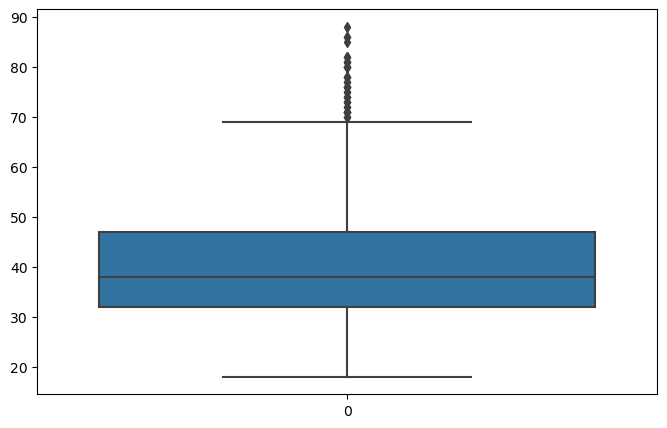

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(df_bank_dum.age) 

In [38]:
df_bank_dum[df_bank_dum.age > 83]

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
696,86,0,0,0,1,7,4,2,-1.1,94.199,...,0,0,1,0,0,1,0,1,0,0
1123,85,0,0,2,2,999,0,1,-3.4,92.431,...,0,1,0,0,0,0,0,0,0,0
1215,88,1,0,0,2,999,0,1,-1.8,92.843,...,0,0,0,0,0,0,1,0,0,0
1796,86,0,0,2,1,999,0,1,-1.1,94.199,...,0,0,1,0,0,1,0,1,0,0


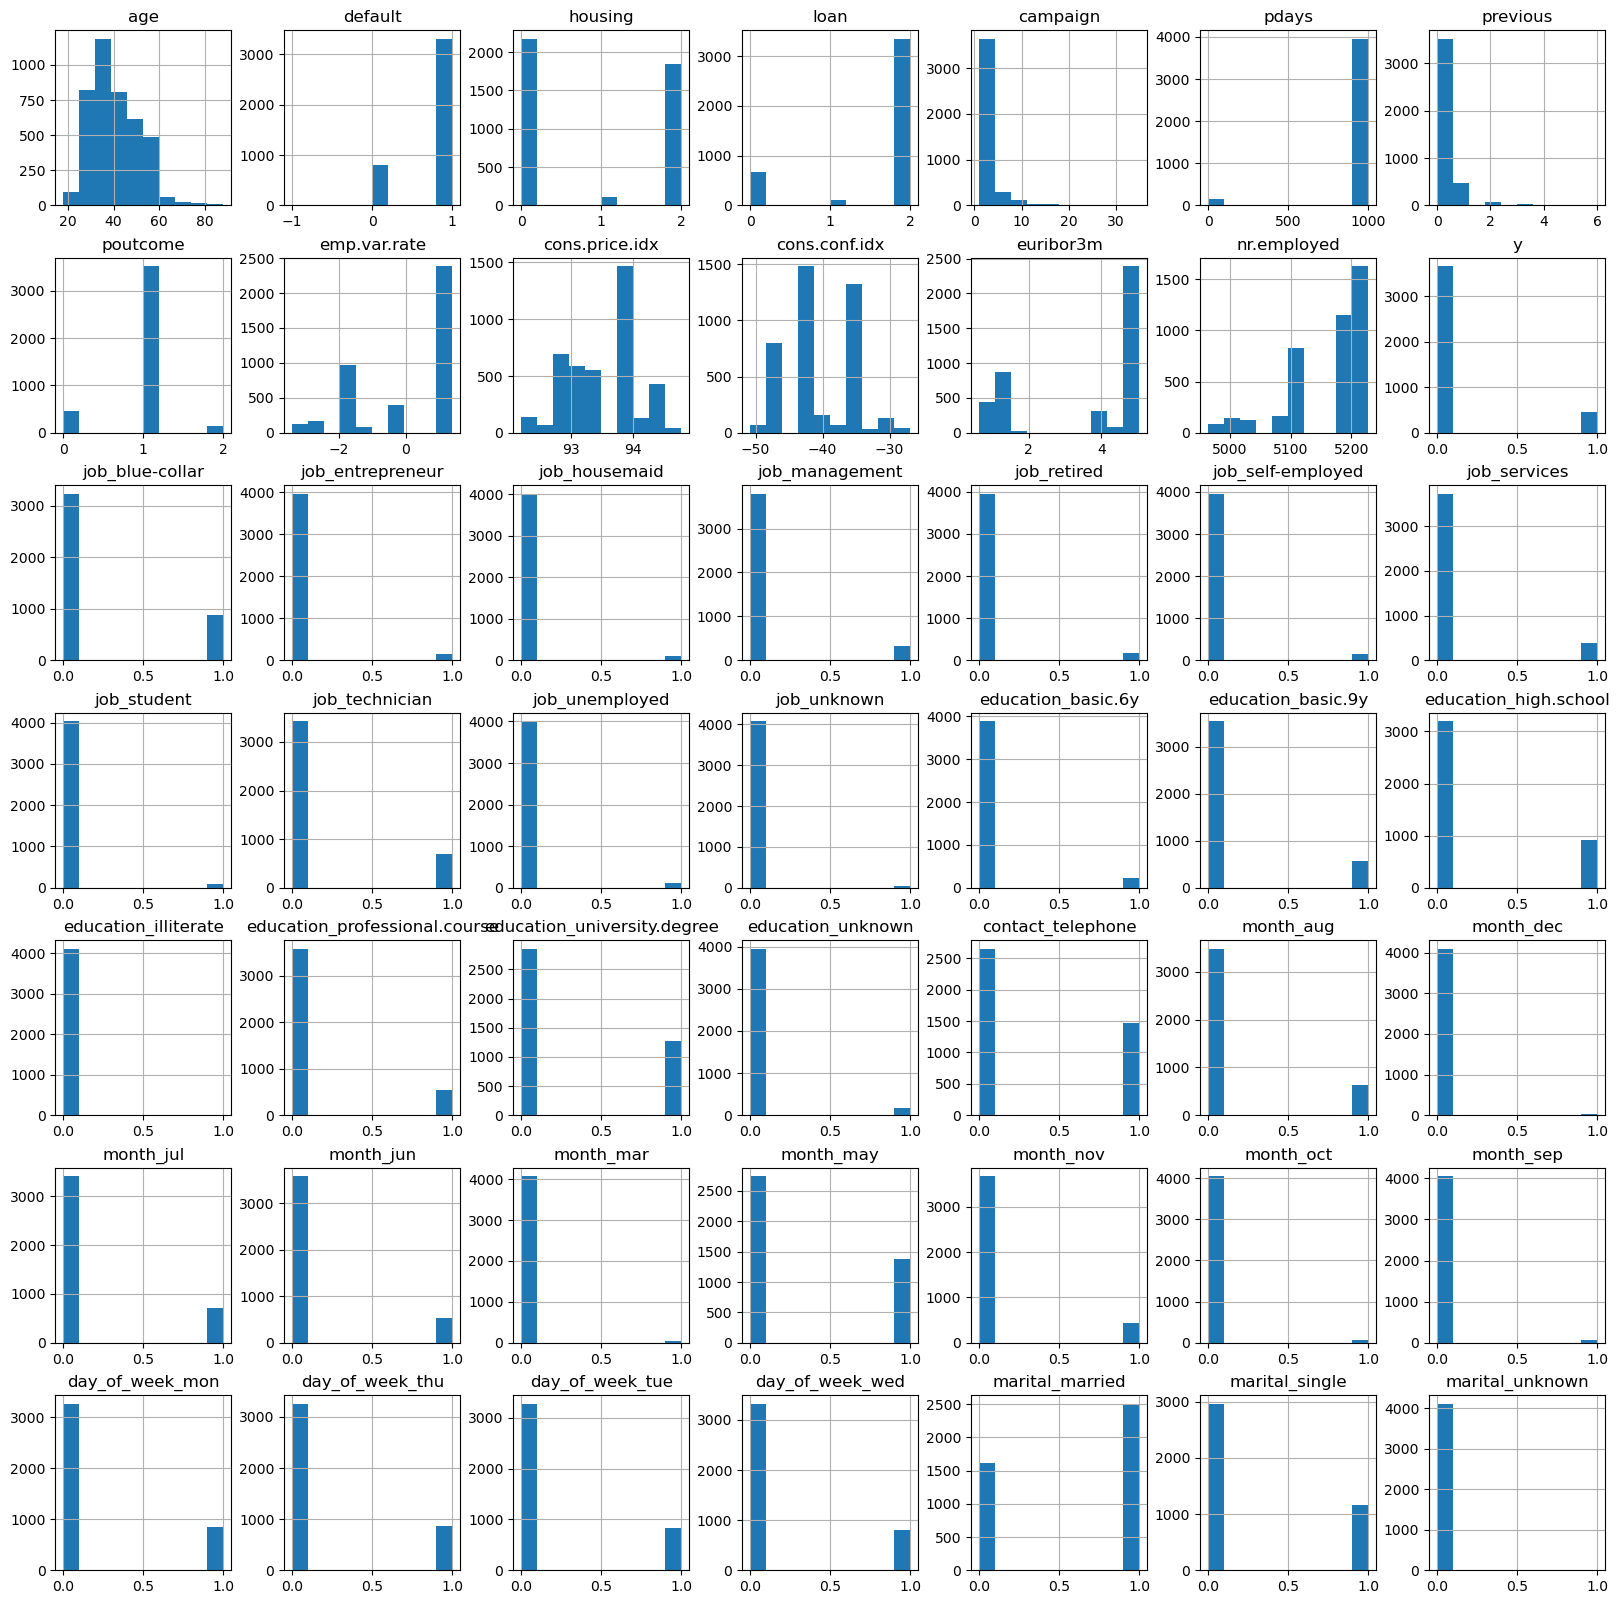

In [39]:
df_bank_dum.hist(figsize = (20,20))
plt.show()

<Axes: ylabel='count'>

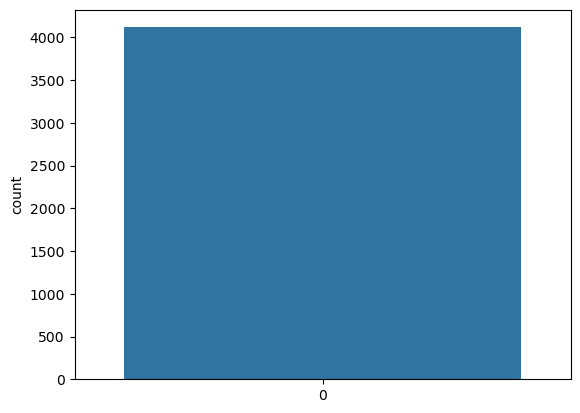

In [40]:
sns.countplot(df_bank_dum.poutcome)

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='poutcome', ylabel='age'>

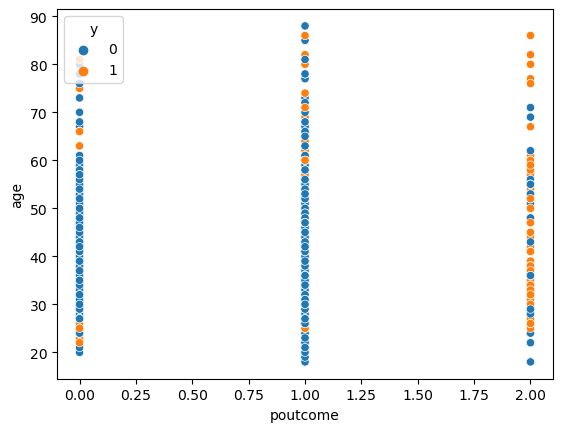

In [41]:
sns.scatterplot(x='poutcome', y='age', data=df_bank_dum, hue='y')

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='poutcome', ylabel='loan'>

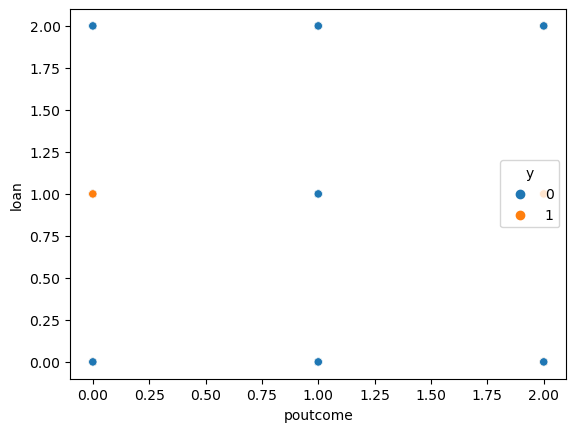

In [42]:
sns.scatterplot(x='poutcome', y='loan', data=df_bank_dum, hue='y')

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='age', ylabel='cons.price.idx'>

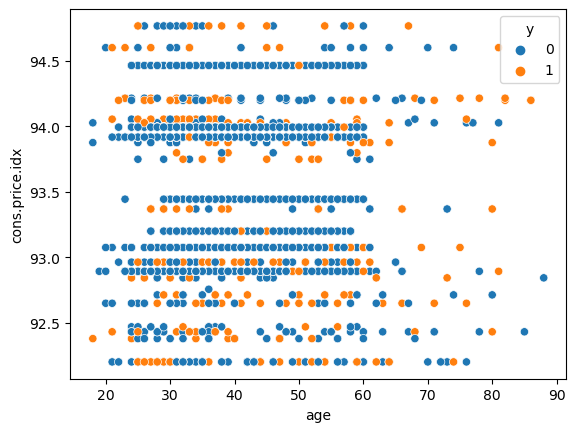

In [43]:
sns.scatterplot(x='age', y='cons.price.idx', data=df_bank_dum, hue='y')

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='age', ylabel='campaign'>

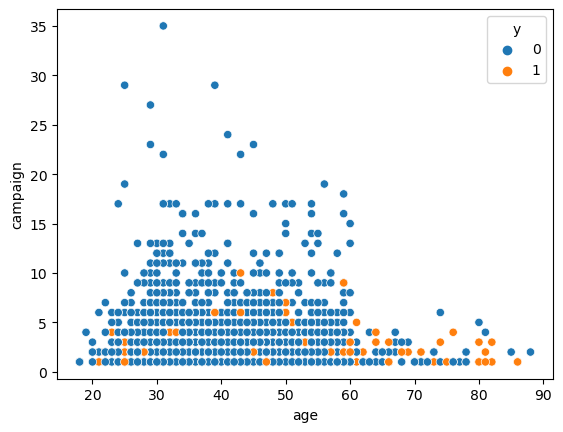

In [44]:
sns.scatterplot(x='age', y='campaign', data=df_bank_dum, hue='y')

Text(0, 0.5, 'Purchase Frequency')

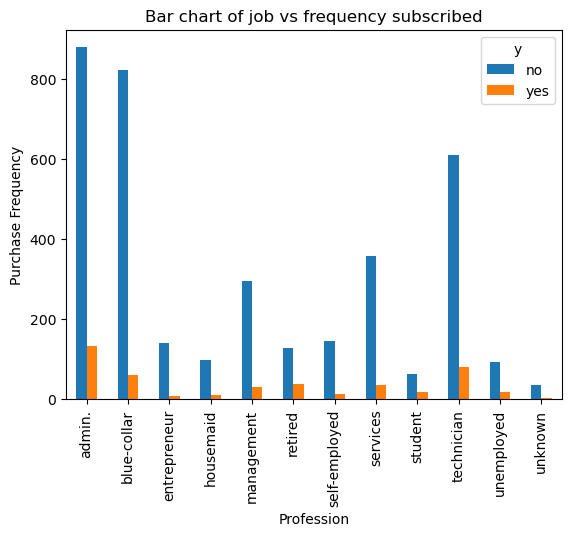

In [45]:
pd.crosstab(df_bank["job"], df_bank["y"]).plot(kind='bar')
plt.title("Bar chart of job vs frequency subscribed")
plt.xlabel("Profession")
plt.ylabel("Purchase Frequency")

<Axes: >

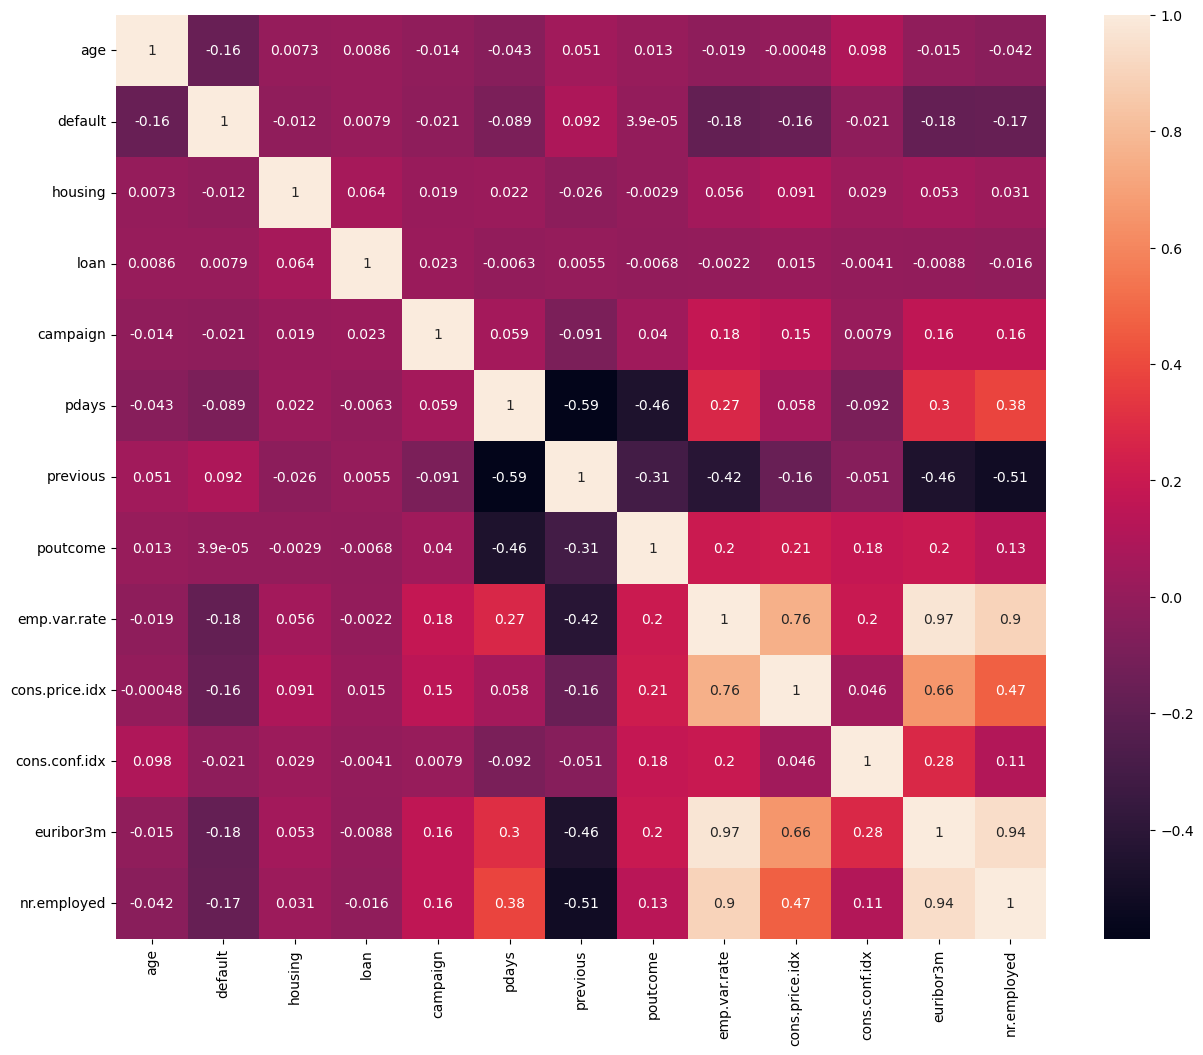

In [46]:
plt.figure(figsize=(15,12))
numeric_df = df_bank.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot = True)

In [47]:
df_bank_dum.corr()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
age,1.000000,-0.160562,0.007279,0.008605,-0.014169,-0.043425,0.050931,0.012975,-0.019192,-0.000482,...,0.007677,0.059281,0.038781,0.025359,-0.005081,0.043129,-0.062716,0.275499,-0.417465,0.010834
default,-0.160562,1.000000,-0.011599,0.007872,-0.021068,-0.089457,0.091654,0.000039,-0.183946,-0.161372,...,0.090819,0.049942,0.051937,-0.013418,-0.011920,-0.017650,0.036201,-0.128603,0.123003,0.013619
housing,0.007279,-0.011599,1.000000,0.064208,0.018502,0.021673,-0.025531,-0.002946,0.055823,0.091175,...,-0.033847,0.014668,-0.005546,0.008363,-0.009015,-0.007589,-0.002595,0.010958,-0.009315,0.009072
loan,0.008605,0.007872,0.064208,1.000000,0.023456,-0.006321,0.005520,-0.006759,-0.002150,0.014750,...,0.002508,0.012853,0.016668,0.021690,-0.009173,0.012176,-0.012471,-0.009327,0.007065,0.011623
campaign,-0.014169,-0.021068,0.018502,0.023456,1.000000,0.058742,-0.091490,0.039979,0.176079,0.145021,...,-0.092381,-0.054567,-0.040810,0.023227,-0.006292,0.001210,-0.038121,-0.004651,0.004534,0.000165
pdays,-0.043425,-0.089457,0.021673,-0.006321,0.058742,1.000000,-0.587941,-0.459420,0.270684,0.058472,...,-0.035101,-0.071509,-0.188074,-0.011757,-0.001868,-0.016659,0.028307,0.024330,-0.042510,0.010403
previous,0.050931,0.091654,-0.025531,0.005520,-0.091490,-0.587941,1.000000,-0.306107,-0.415238,-0.164922,...,0.072271,0.107786,0.202262,0.012444,-0.005172,-0.000082,-0.015124,-0.038168,0.049452,-0.009498
poutcome,0.012975,0.000039,-0.002946,-0.006759,0.039979,-0.459420,-0.306107,1.000000,0.203815,0.214508,...,-0.061237,-0.039448,0.009730,0.009255,0.005035,0.017292,-0.019442,0.014746,-0.006766,-0.002105
emp.var.rate,-0.019192,-0.183946,0.055823,-0.002150,0.176079,0.270684,-0.415238,0.203815,1.000000,0.755155,...,-0.112626,-0.211403,-0.167468,-0.032192,0.002876,0.021864,0.020171,0.069719,-0.085138,0.003206
cons.price.idx,-0.000482,-0.161372,0.091175,0.014750,0.145021,0.058472,-0.164922,0.214508,0.755155,1.000000,...,-0.204440,-0.090321,-0.019875,0.008840,-0.013243,-0.001808,-0.001288,0.041667,-0.053530,-0.003766


<Axes: >

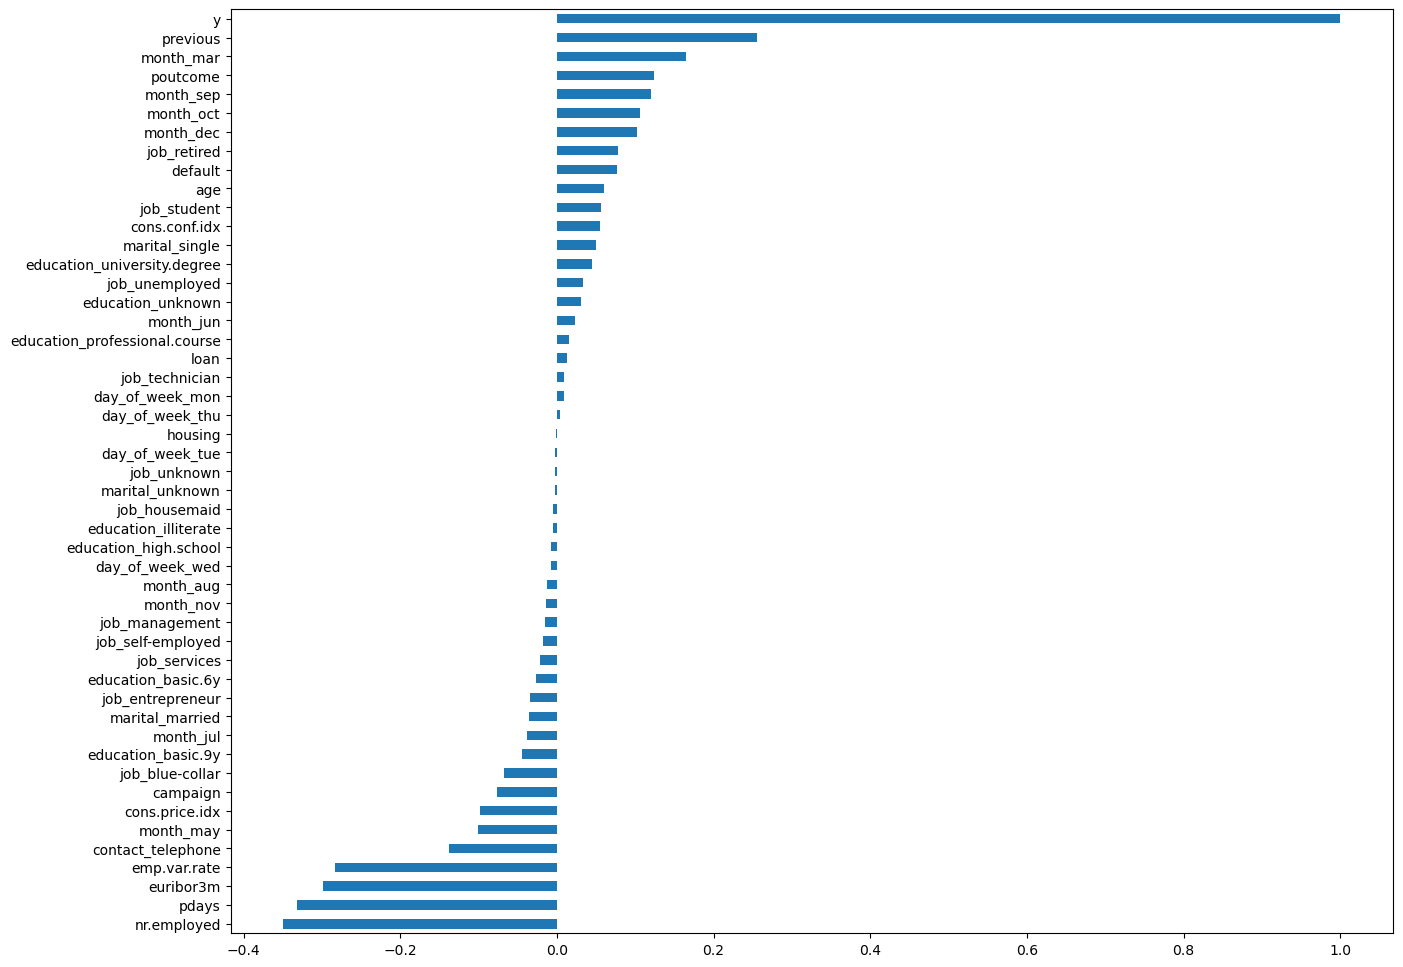

In [48]:
plt.figure(figsize=(15,12))
df_bank_dum.corr()["y"].sort_values().plot.barh()

<Axes: >

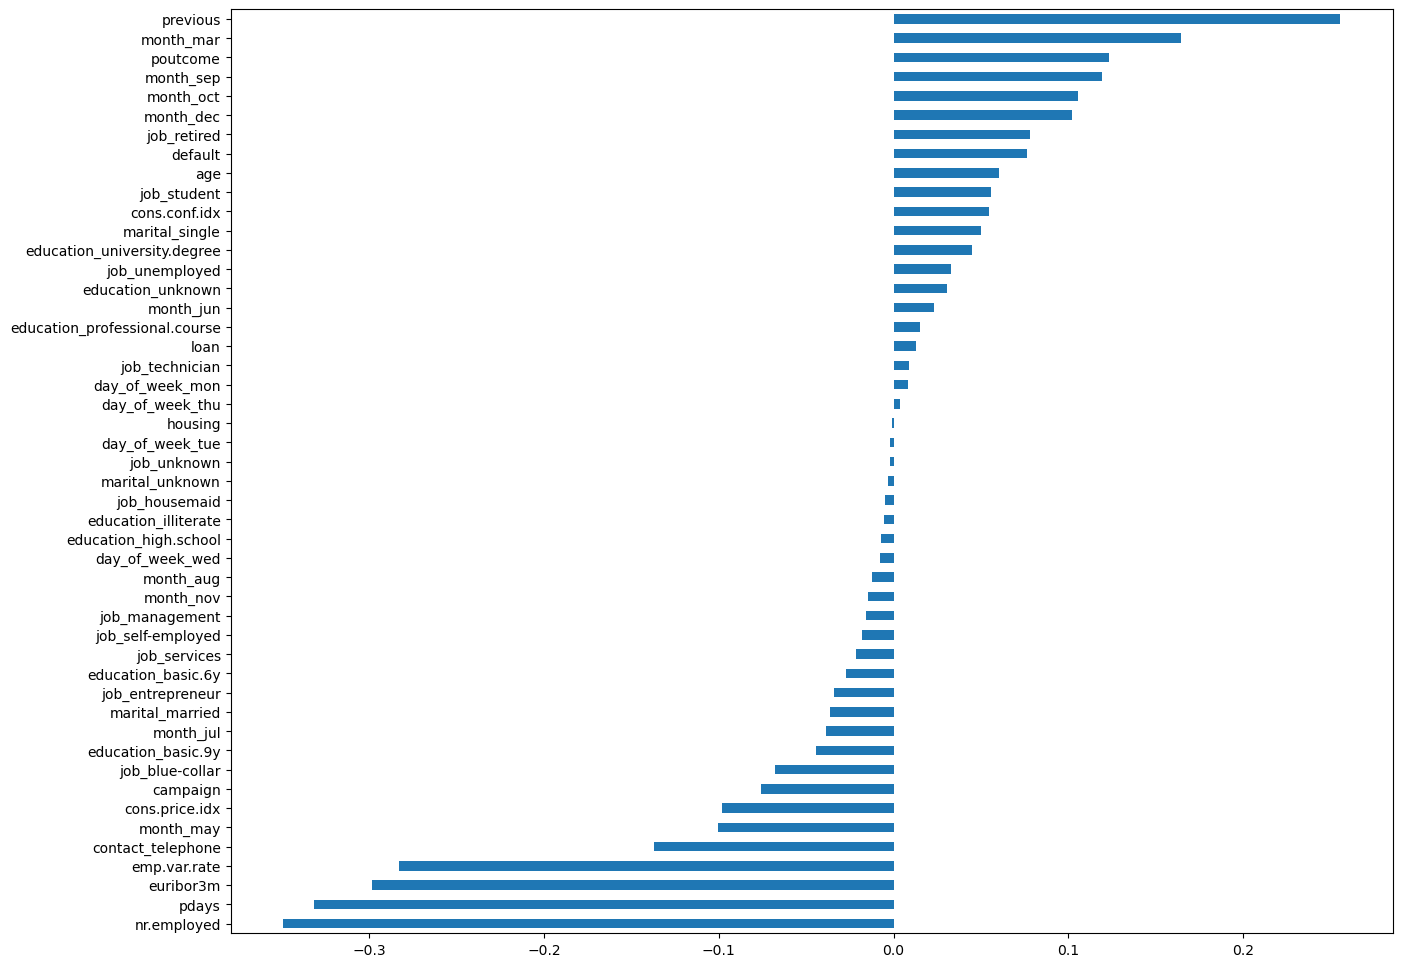

In [49]:
plt.figure(figsize=(15,12))
df_bank_dum.corr()["y"].drop("y").sort_values().plot.barh()

##  Machine Learning 

In [50]:
X = df_bank_dum.drop(["y"], axis=1)
y = df_bank_dum["y"]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test)

In [53]:
df_bank_dum.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
0,30,1,0,2,2,999,0,1,-1.8,92.893,...,0,0,0,0,0,0,0,1,0,0
1,39,1,2,2,4,999,0,1,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
2,25,1,0,2,1,999,0,1,1.4,94.465,...,0,0,0,0,0,0,1,1,0,0
3,38,1,1,1,3,999,0,1,1.4,94.465,...,0,0,0,0,0,0,0,1,0,0
4,47,1,0,2,1,999,0,1,-0.1,93.200,...,1,0,0,1,0,0,0,1,0,0


In [54]:
X_train_scaled


array([[-0.68496295,  0.48525309, -0.94525077, ...,  0.80621025,
        -0.62379733, -0.04933387],
       [-0.68496295,  0.48525309,  1.08777879, ..., -1.24037124,
         1.60308478, -0.04933387],
       [ 1.15594482,  0.48525309,  1.08777879, ...,  0.80621025,
        -0.62379733, -0.04933387],
       ...,
       [-1.26630225,  0.48525309, -0.94525077, ..., -1.24037124,
         1.60308478, -0.04933387],
       [-0.58807307,  0.48525309, -0.94525077, ...,  0.80621025,
        -0.62379733, -0.04933387],
       [-0.9756326 ,  0.48525309,  1.08777879, ..., -1.24037124,
         1.60308478, -0.04933387]])

In [55]:
X_train2 = pd.DataFrame(X_train_scaled, columns = X_train.columns )

X_train2

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
0,-0.684963,0.485253,-0.945251,0.476833,-0.612111,0.203477,-0.35707,0.203395,0.651824,0.721148,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,-0.505211,2.052707,0.806210,-0.623797,-0.049334
1,-0.684963,0.485253,1.087779,0.476833,-0.612111,0.203477,-0.35707,0.203395,0.651824,0.721148,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,-0.505211,-0.487161,-1.240371,1.603085,-0.049334
2,1.155945,0.485253,1.087779,0.476833,-0.207921,0.203477,-0.35707,0.203395,0.651824,0.721148,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,-0.505211,2.052707,0.806210,-0.623797,-0.049334
3,-0.781853,0.485253,0.071264,-0.861467,-0.612111,0.203477,1.46421,-2.445567,-1.191692,-1.169946,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,-0.505211,2.052707,-1.240371,1.603085,-0.049334
4,-0.103624,0.485253,-0.945251,0.476833,-0.207921,0.203477,-0.35707,0.203395,0.651824,0.721148,...,-0.351861,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,0.806210,-0.623797,-0.049334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,1.931064,0.485253,1.087779,0.476833,4.238161,0.203477,-0.35707,0.203395,0.842532,-0.223540,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,1.979371,-0.487161,0.806210,-0.623797,-0.049334
3291,0.090156,0.485253,1.087779,0.476833,-0.612111,0.203477,-0.35707,0.203395,-0.111010,-0.642638,...,2.842030,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,-1.240371,-0.623797,-0.049334
3292,-1.266302,0.485253,-0.945251,0.476833,-0.612111,0.203477,-0.35707,0.203395,0.842532,0.590609,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,-0.505211,2.052707,-1.240371,1.603085,-0.049334
3293,-0.588073,0.485253,-0.945251,0.476833,1.004647,0.203477,-0.35707,0.203395,-0.746705,1.073259,...,-0.351861,-0.137339,8.224709,1.944812,-0.514660,-0.505211,-0.487161,0.806210,-0.623797,-0.049334


In [56]:
X_test2 = pd.DataFrame(X_test_scaled, columns = X_test.columns )

X_test2

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_married,marital_single,marital_unknown
0,0.768385,0.485253,1.087779,0.476833,-0.612111,0.203477,-0.357070,0.203395,-1.128122,0.777829,...,-0.351861,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,-1.240371,-0.623797,-0.049334
1,-0.491183,0.485253,1.087779,-2.199767,-0.612111,0.203477,-0.357070,0.203395,0.842532,1.530144,...,-0.351861,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,0.806210,-0.623797,-0.049334
2,1.543504,0.485253,-0.945251,0.476833,-0.612111,0.203477,1.464210,-2.445567,-0.111010,-0.642638,...,2.842030,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,-1.240371,-0.623797,-0.049334
3,-1.072522,0.485253,1.087779,0.476833,-0.207921,0.203477,-0.357070,0.203395,-1.890956,-1.049713,...,-0.351861,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,-1.240371,1.603085,-0.049334
4,2.124844,0.485253,1.087779,0.476833,-0.207921,0.203477,-0.357070,0.203395,-1.191692,-1.255826,...,-0.351861,-0.137339,-0.121585,1.944812,-0.514660,-0.505211,-0.487161,0.806210,-0.623797,-0.049334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.103624,0.485253,-0.945251,0.476833,-0.207921,-4.912575,5.106771,2.852357,-1.191692,0.518469,...,-0.351861,-0.137339,-0.121585,-0.514189,1.943029,-0.505211,-0.487161,0.806210,-0.623797,-0.049334
820,0.090156,0.485253,1.087779,0.476833,-0.207921,0.203477,-0.357070,0.203395,0.842532,-0.223540,...,-0.351861,-0.137339,-0.121585,1.944812,-0.514660,-0.505211,-0.487161,0.806210,-0.623797,-0.049334
821,0.671495,0.485253,1.087779,0.476833,-0.612111,0.203477,-0.357070,0.203395,0.842532,0.590609,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,1.979371,-0.487161,-1.240371,1.603085,-0.049334
822,-0.781853,0.485253,-0.945251,0.476833,0.196268,0.203477,-0.357070,0.203395,0.842532,1.530144,...,-0.351861,-0.137339,-0.121585,-0.514189,-0.514660,-0.505211,-0.487161,0.806210,-0.623797,-0.049334


## Decision Tree (Gini)

In [57]:
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion ="gini", max_depth = 3, random_state = 42) 
model_gini.fit(X_train2, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [58]:
y_pred = model_gini.predict(X_test2)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
(y_test, y_pred)

(889     1
 2669    0
 2707    0
 2258    0
 2514    1
        ..
 2488    1
 949     0
 3883    0
 2059    0
 3514    0
 Name: y, Length: 824, dtype: int64,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0,

In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[727   5]
 [ 76  16]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       732
           1       0.76      0.17      0.28        92

    accuracy                           0.90       824
   macro avg       0.83      0.58      0.62       824
weighted avg       0.89      0.90      0.87       824



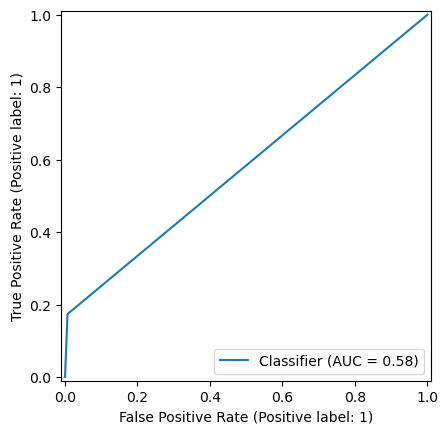

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)

### Tree Schematic

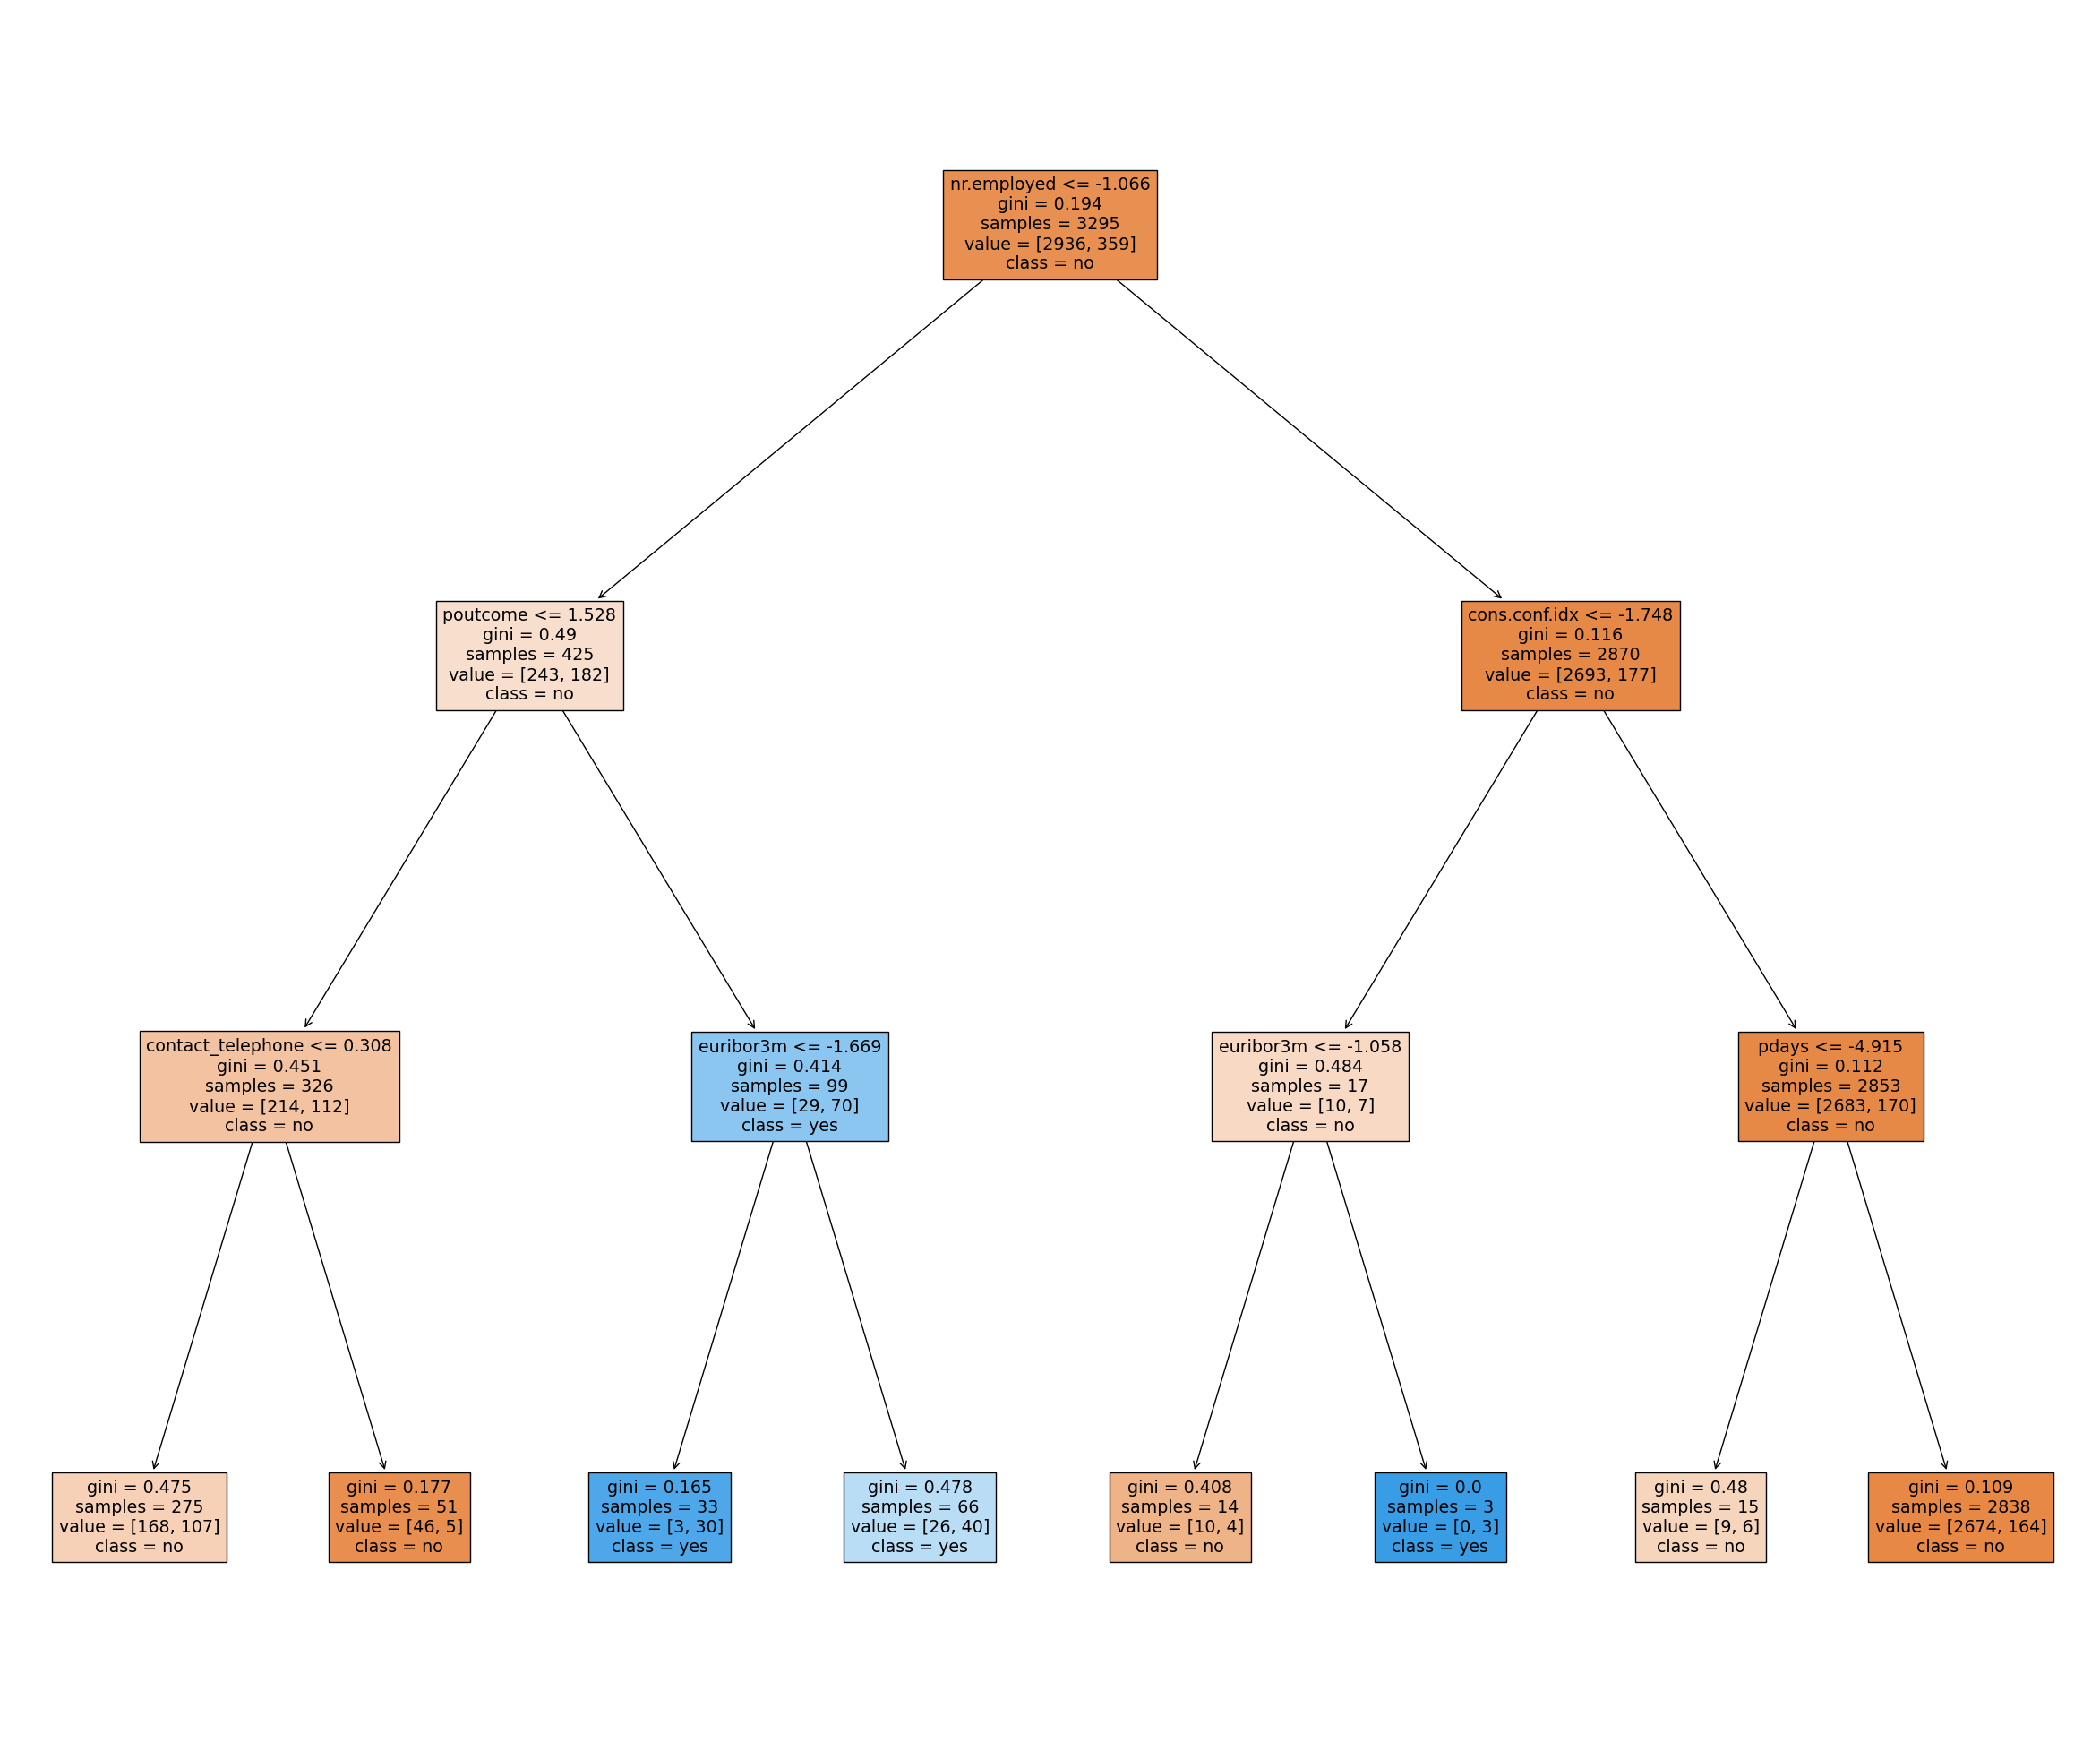

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize = (30,25))
plot_tree(model_gini, filled = True, feature_names = X.columns, class_names = df_bank.y.unique());

# Decision Tree (Entropy)

In [63]:
model_entropy = DecisionTreeClassifier(criterion ="entropy", max_depth = 3, random_state = 42) 
model_entropy.fit(X_train2, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [64]:
y_pred_entropy = model_entropy.predict(X_test2)

y_pred_entropy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

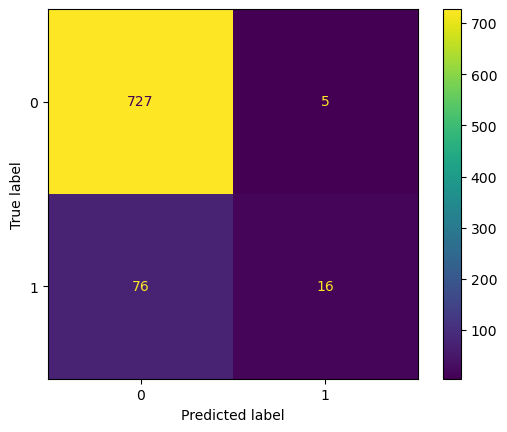

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [66]:
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

[[727   5]
 [ 77  15]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       732
           1       0.75      0.16      0.27        92

    accuracy                           0.90       824
   macro avg       0.83      0.58      0.61       824
weighted avg       0.89      0.90      0.87       824



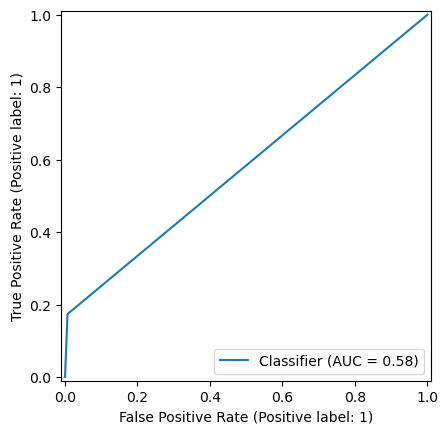

In [67]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)

###  SVM

In [68]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train_scaled, y_train)

y_pred_svm = model_svm.predict(X_test_scaled)

In [69]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       732
           1       0.67      0.17      0.28        92

    accuracy                           0.90       824
   macro avg       0.79      0.58      0.61       824
weighted avg       0.88      0.90      0.87       824



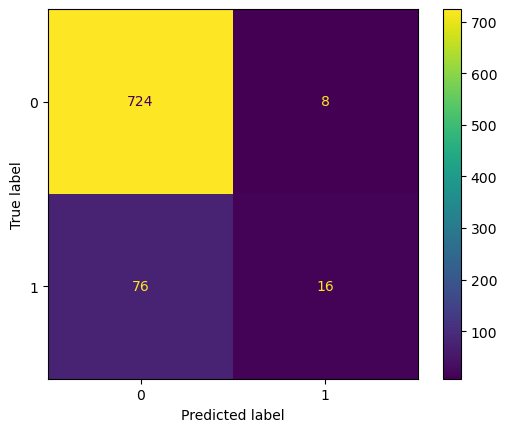

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

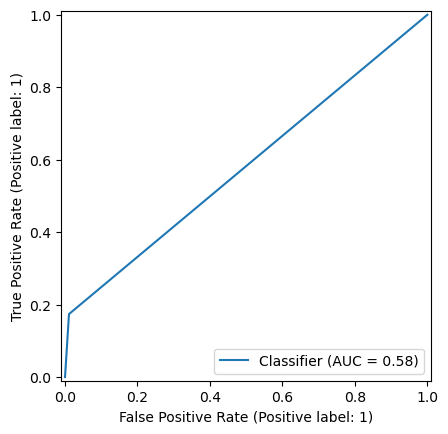

In [71]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_svm)

### Random Forest

In [72]:
model_rand = RandomForestClassifier(random_state = 42)

model_rand.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
y_pred_rand = model_rand.predict(X_test) 

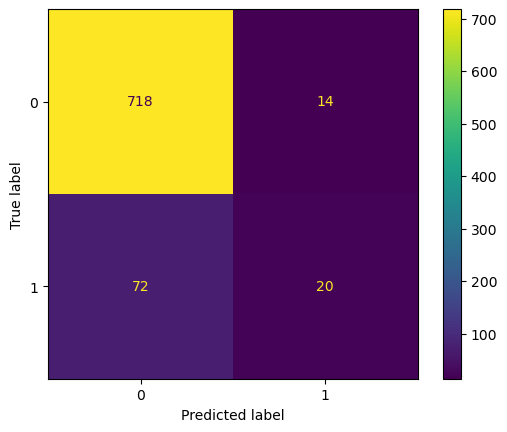

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rand)

In [75]:
print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.59      0.22      0.32        92

    accuracy                           0.90       824
   macro avg       0.75      0.60      0.63       824
weighted avg       0.87      0.90      0.87       824



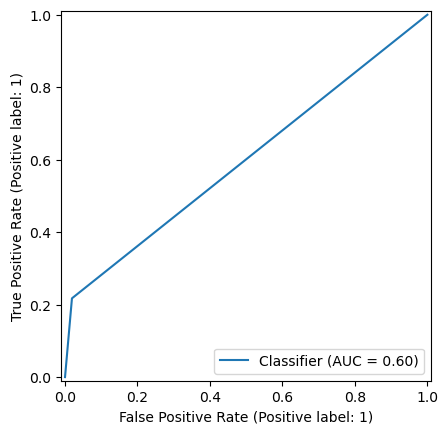

In [76]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_rand)

##  KNN

In [77]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

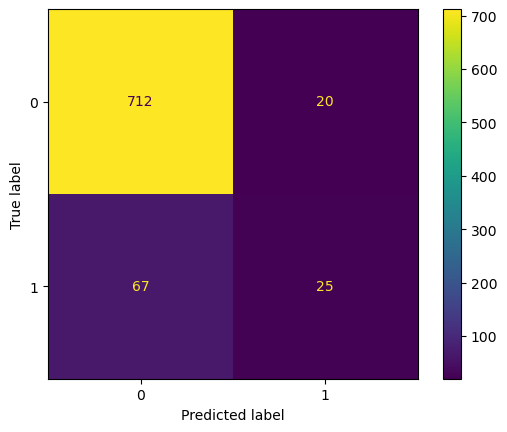

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

In [79]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       732
           1       0.56      0.27      0.36        92

    accuracy                           0.89       824
   macro avg       0.73      0.62      0.65       824
weighted avg       0.87      0.89      0.88       824



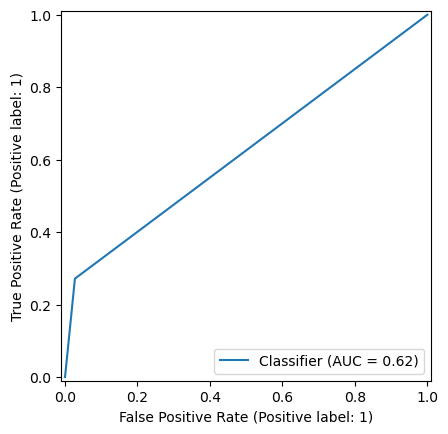

In [80]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_knn)

## Logistic Regression

In [81]:
model_log = LogisticRegression()

model_log.fit(X_train_scaled, y_train)



LogisticRegression()

In [82]:
y_pred_log = model_log.predict(X_test_scaled)

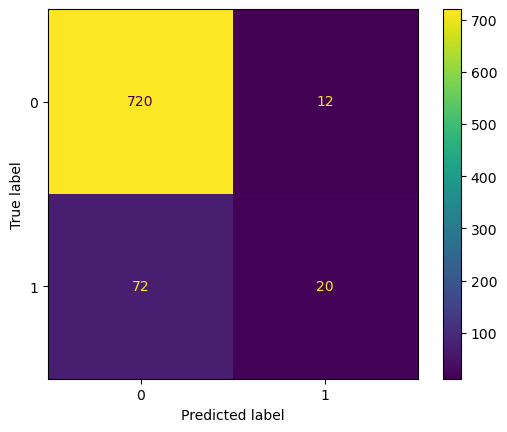

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)

In [84]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.62      0.22      0.32        92

    accuracy                           0.90       824
   macro avg       0.77      0.60      0.63       824
weighted avg       0.88      0.90      0.88       824



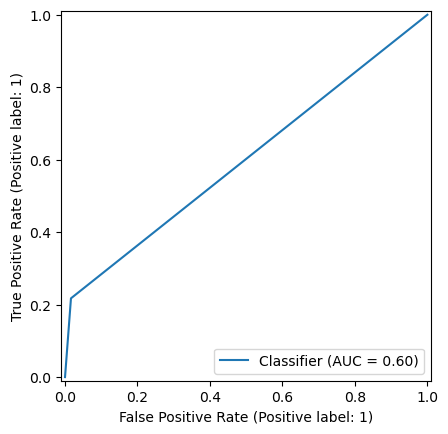

In [85]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_log)

## AdaBoost

In [86]:
model_ada = AdaBoostClassifier(n_estimators = 400, learning_rate = 1, random_state = 40)

model_ada.fit(X_train, y_train)

C:\Users\yasin\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=40)

In [87]:
y_pred_ada = model_ada.predict(X_test)

In [88]:
y_pred_ada

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

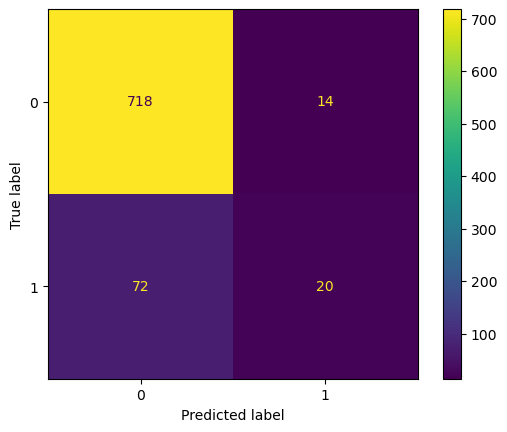

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada)

In [90]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.59      0.22      0.32        92

    accuracy                           0.90       824
   macro avg       0.75      0.60      0.63       824
weighted avg       0.87      0.90      0.87       824



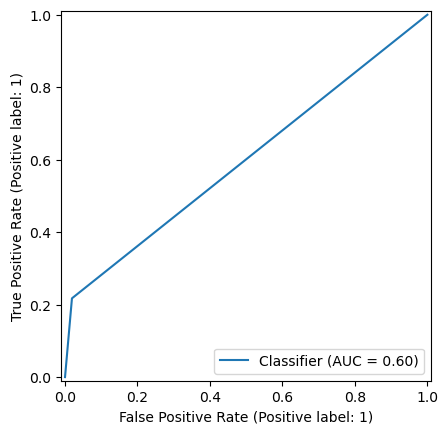

In [91]:
RocCurveDisplay.from_predictions(y_test, y_pred_ada)

### XGBoost

XGBoost's base estimator is Decision Tree. Can be change if wanted. 
max_depth is max number of branch of the tree.

In [92]:
from xgboost import XGBClassifier

#Creating XGB object

xgb = XGBClassifier(n_estimators = 400, max_depth = 6, learning_rate = 1.25, random_state = 40)

In [93]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)

In [94]:
# Training
model_xgb = xgb.fit(X_train, y_train)

C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\ya

In [95]:
# Prediction
y_pred_xgb = model_xgb.predict(X_test)

C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [96]:
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

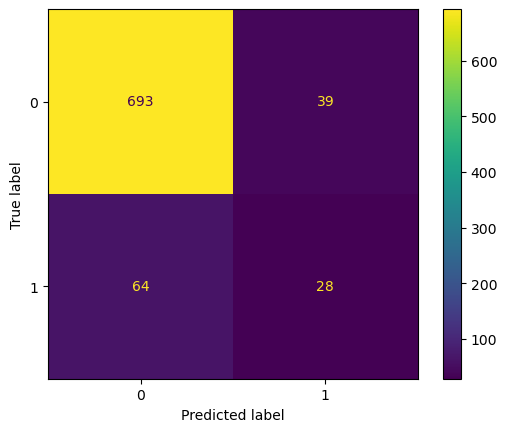

In [97]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

In [98]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       732
           1       0.42      0.30      0.35        92

    accuracy                           0.88       824
   macro avg       0.67      0.63      0.64       824
weighted avg       0.86      0.88      0.87       824



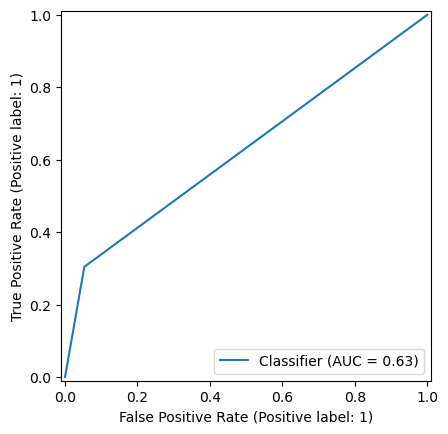

In [99]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb)

###  GridSearch

In [100]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [101]:
xgb_grid = {
    'n_estimators' : [100, 200, 400, 800],
    'max_depth' : [2, 3, 4, 5, 6, 8],
    'learning_rate' : [0, 1, 0.01, 0.9]
}

In [102]:
xgbg = XGBRegressor()

In [103]:
xgb_cv = GridSearchCV(xgbg, param_grid = xgb_grid, cv =10, n_jobs = -1, verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\yasin\anaconda3\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\ya

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0, 1, 0.01, 0.9],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'n_estimators': [100, 200, 400, 800]},
             verbose=2)

In [104]:
xgb_cv.best_params_["max_depth"]

2

In [105]:
xgb_cv.best_params_["n_estimators"]

400

In [106]:
xgb_cv.best_params_["learning_rate"]

0.01

#### Model Comparing

In [107]:
acc_log = accuracy_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
acc_dec = accuracy_score(y_test, y_pred_entropy)
rec_dec = recall_score(y_test, y_pred_entropy)
acc_rand = accuracy_score(y_test, y_pred_rand)
rec_rand = recall_score(y_test, y_pred_rand)
acc_knn = accuracy_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_rand = f1_score(y_test, y_pred_rand)
f1_knn = f1_score(y_test, y_pred_knn)
f1_dec = f1_score(y_test, y_pred_entropy)
f1_log = f1_score(y_test, y_pred_log)
f1_svm = f1_score(y_test, y_pred_svm)
acc_ada = accuracy_score(y_test, y_pred_ada)
rec_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)


In [108]:
CompareX = pd.DataFrame({"Model": ["Logistic_Regression", "Decision_Tree", "Random_Forest", "KNN", "SVM", "AdaBoost", "XGBoost"], 
                         "Accuracy": [acc_log, acc_dec, acc_rand, acc_knn, acc_svm, acc_ada, acc_xgb],
                         "Recall": [rec_log, rec_dec, rec_rand, rec_knn, rec_svm, rec_ada, rec_xgb],
                         "F1-Score":[f1_log, f1_dec, f1_rand, f1_knn, f1_svm, f1_ada, f1_xgb]})

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='F1-Score', ylabel='Model'>

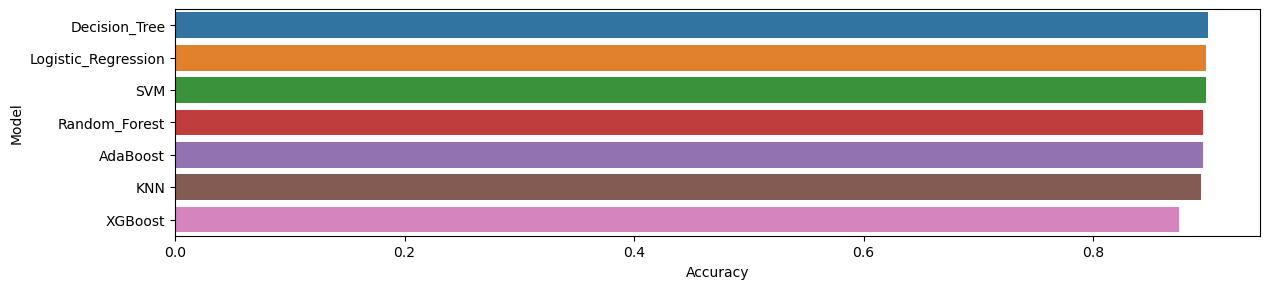

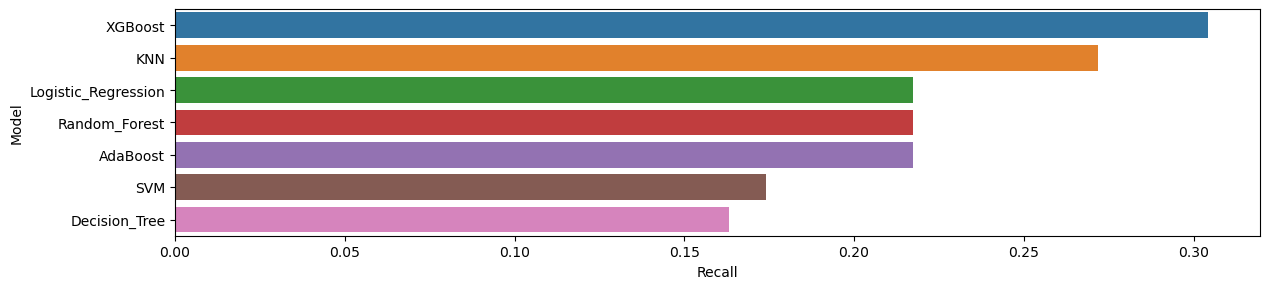

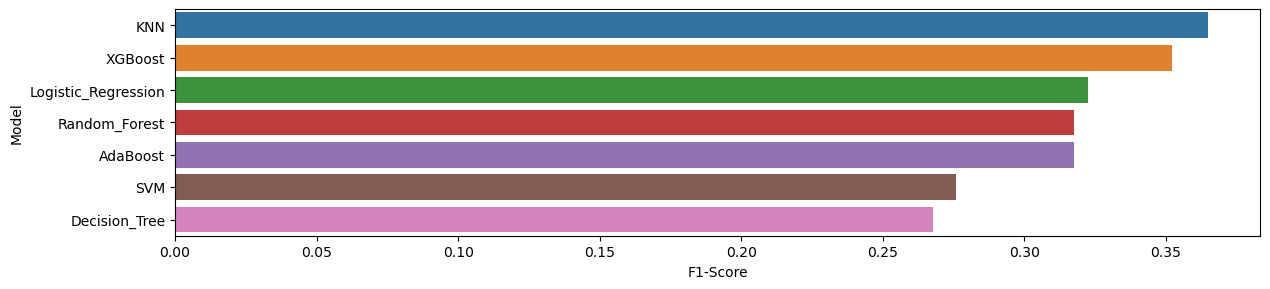

In [109]:
plt.figure(figsize=(14,10))
plt.subplot(311) # Resizing the frame.
compare = CompareX.sort_values(by="Accuracy", ascending=False)
sns.barplot(x="Accuracy", y="Model", data=compare )

plt.figure(figsize=(14,10))
plt.subplot(312)  
compare = CompareX.sort_values(by="Recall", ascending=False)
sns.barplot(x="Recall", y="Model", data=compare )

plt.figure(figsize=(14,10))
plt.subplot(312)  
compare = CompareX.sort_values(by="F1-Score", ascending=False)
sns.barplot(x="F1-Score", y="Model", data=compare )